In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



df = pd.read_csv('Dataset_B_hotel.csv')
df.head()


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [44]:
# Cek info tipe data
df.info()

# Cek missing values
df.isnull().sum()

# Cek duplikat
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

np.int64(0)

In [45]:
# Statistik umum
df.describe()


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Visualisasi Distribusi & Korelasi

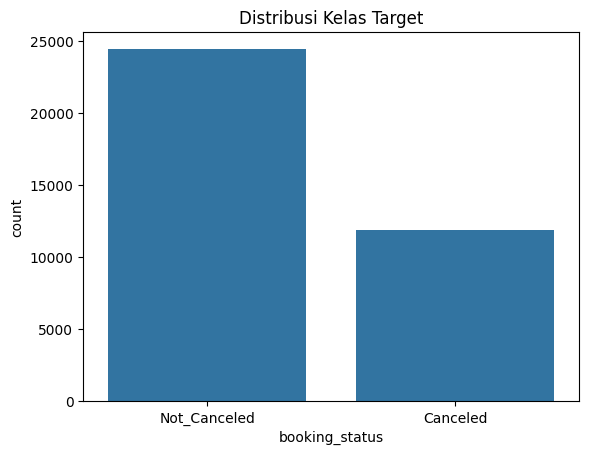

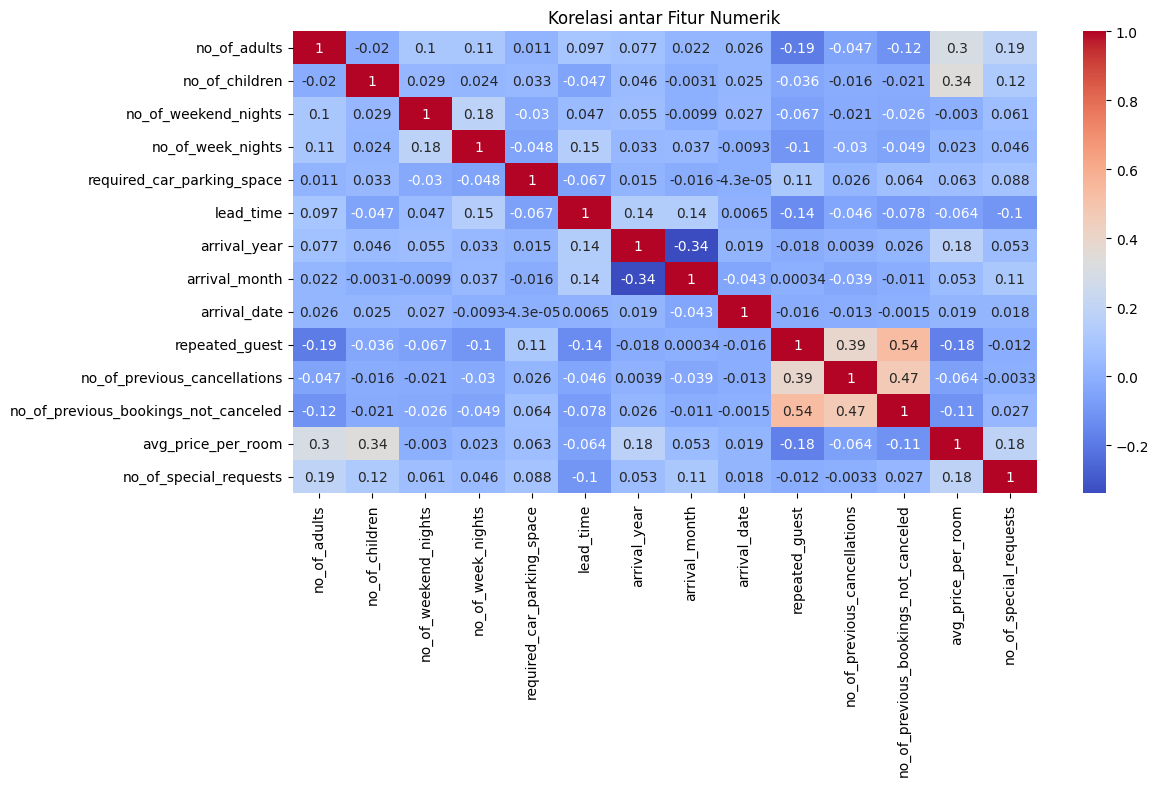

In [46]:
# Plot distribusi kelas target
sns.countplot(x='booking_status', data=df)
plt.title('Distribusi Kelas Target')
plt.show()

# Ambil kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar Fitur Numerik")
plt.show()


Encoding & Scaling

In [47]:
# Label encoding untuk kolom kategorikal (sederhana)
categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Scaling fitur numerik
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns='booking_status').columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

Split Data

In [48]:
# Encoding kolom kategorik
df_encoded = pd.get_dummies(df, drop_first=True)

# Pisahkan fitur dan label
X = df_encoded.drop('booking_status', axis=1)
y = df_encoded['booking_status']

Train & Evaluasi Random Forest

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

# Evaluasi
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8971743625086147
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      2416
           1       0.90      0.95      0.92      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.87      0.88      7255
weighted avg       0.90      0.90      0.90      7255



Train & Evaluasi XGBoost

In [50]:
# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Prediksi
y_pred_xgb = xgb.predict(X_test)

# Evaluasi
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8876636802205375
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.82      2416
           1       0.90      0.93      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.88      0.86      0.87      7255
weighted avg       0.89      0.89      0.89      7255



In [52]:
best_model = rf

# Simpan model dengan pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
